## Project: Model to Predict Term Deposit Subscription by Clients

#### Table of Contents
- [Introduction](#intro)
- [Data Gathering](#gather)
- [Exploratory Data Analysis](#explore)
- [Feature Engineering](#feature)
- [Modeling and Evaluation](#model)
- [Conclusion](#conclude)

<a id="intro"></a>
#### Introduction

The objective of this project is to build a predictive model to determine the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.

The datasets provided are described below:
1) **bank-additional-full.csv** with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed. 
2) **bank-additional.csv** with 10% of the examples (4119), randomly selected from 1), and 20 inputs. 
3) **bank-full.csv** with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).  
4) **bank.csv** with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).  

Since **bank-additional-full.csv** is the most complete dataset and the most recent version, this project will use that dataset for the model.

The variables in the dateset are as follows.

- age: age of client

- job : type of job 

 - marital : marital status 

- education:  

 - default: has credit in default

- housing: has housing loan

- loan: has personal loan

- contact: contact communication type 

- month: last contact month of year

- day_of_week: last contact day of the week 

 - duration: last contact duration, in seconds 

- campaign: number of contacts performed during this campaign and for this client 

- pdays: number of days that passed by after the client was last contacted from a previous campaign 

- previous: number of contacts performed before this campaign and for this client 

- poutcome: outcome of the previous marketing campaign 

- emp.var.rate: employment variation rate 

- cons.price.idx: consumer price index 

 - cons.conf.idx: consumer confidence index 

 - euribor3m: euribor 3 month rate 

- nr.employed: number of employees

Predict variable (desired target):
- y: has the client subscribed a term deposit? 

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

<a id="gather"></a>
##### Data Gathering

In [2]:
# import the semi-colon separated bank-additional-full.csv file into a dataframe
df = pd.read_csv("bank-additional-full.csv",sep=';')

In [3]:
# set option to display all columns
pd.set_option('display.max_columns', None)

# display first 5 rows of the dataframe
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# display a random sample of 10 rows
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
17742,59,retired,divorced,university.degree,unknown,yes,no,cellular,jul,tue,466,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
5614,45,admin.,married,basic.9y,no,no,no,telephone,may,mon,367,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
38966,58,unknown,married,basic.9y,no,yes,no,cellular,dec,thu,154,1,999,1,failure,-3.0,92.713,-33.0,0.720,5023.5,yes
15122,41,entrepreneur,divorced,basic.9y,no,yes,yes,cellular,jul,thu,115,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
25935,38,blue-collar,married,basic.9y,no,no,no,cellular,nov,wed,559,1,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
1167,53,blue-collar,married,basic.4y,unknown,no,no,telephone,may,thu,178,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
32435,35,technician,married,high.school,unknown,yes,no,cellular,may,fri,104,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
6917,40,admin.,single,unknown,unknown,yes,no,telephone,may,thu,177,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
20211,45,services,married,basic.9y,no,no,no,cellular,aug,mon,744,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
26828,29,blue-collar,single,basic.4y,no,yes,yes,cellular,nov,thu,104,5,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,no


After successfully loading the data into a dataframe, the next step is to perform data assessment to identify any issues with the data that may interfere with the model.

In [5]:
# check shape of dataframe
df.shape

(41188, 21)

The dataset has 41188 rows with 21 columns.

In [6]:
# display dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The data has no nulls and the data types appear appropriate at this stage.

In [7]:
# display summary statistics for numeric columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


There appears to be outliers in the `duration` and `campaign` columns. These will be investigated during exploratory data analysis.

<a id="explore"></a>
#### Exploratory Data Analysis

##### Target variable analysis

In [8]:
# check value counts of y column which indicates subscription or not
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

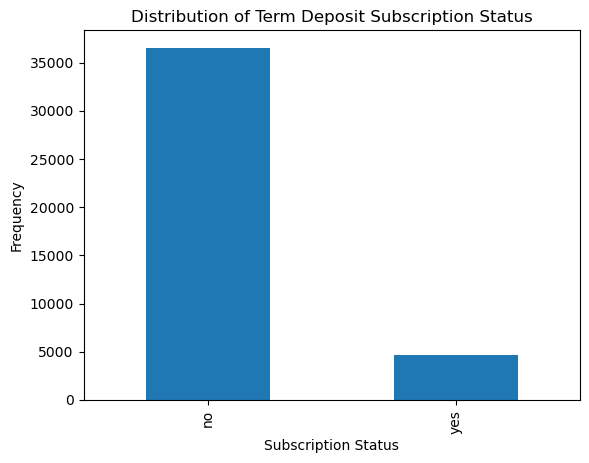

In [9]:
# visualize value counts
# save value counts to variable
response = df['y'].value_counts()
#plot bar chart from value counts
response.plot(kind='bar')
# set xlabel
plt.xlabel("Subscription Status")
# set ylabel
plt.ylabel("Frequency")
# set chart title
plt.title("Distribution of Term Deposit Subscription Status")\
# display chart
plt.show()

Majority of the clients in the survey did not subscribe to a term deposit.

In [10]:
def plot_histogram(column):
    """Plots histogram"""
    plt.figure(figsize=(6,4))
    sns.histplot(df[column], bins =30)
    plt.title(f"Distribution of {column}")
    plt.show

In [11]:
def plot_facetgrid(column, type):
    """Plots a facetgrid of histograms or countplots"""
    if type == 'histogram':
        g = sns.FacetGrid(df, col='y', sharey=True)
        g.map(sns.histplot, column )
        plt.show()
    elif type == 'countplot':
        g = sns.FacetGrid(df, col='y', sharey=True)
        g.map(sns.countplot, column )
        plt.show()

In [12]:
def plot_countplot(column):
    """Plots countplot"""
    sns.countplot(data=df, x=column)
    plt.title(f"Distribution of {column}")
    plt.xlabel(f"{column}")
    plt.ylabel("frequency")
    plt.show()

In [13]:
# get distribution of age 
df['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

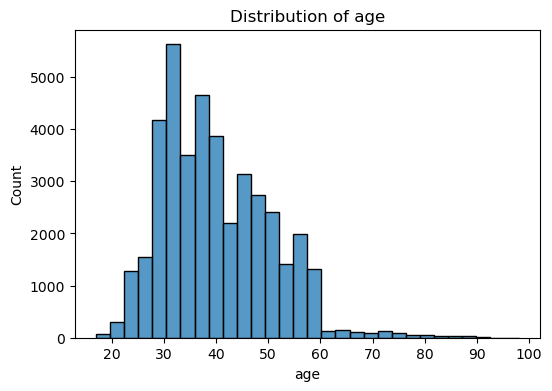

In [14]:
# plot distribution of age
plot_histogram('age')

The distribution of **age** is right skewed with most clients falling between the age of 30 to 40 years old and very few clients older than 60 years. For the model, the ages will be binned.

Next step is to check the age distribution of clients who subscribed to the term deposit and those who did not.


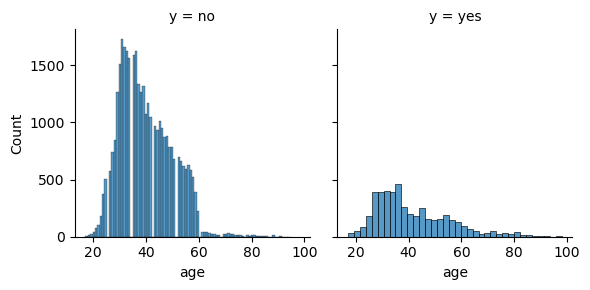

In [15]:
# plot hsitogram of age by subscription outcome
plot_facetgrid('age', 'histogram')

The group of clients that did not subscribe to a term deposit have a larger proportion of young individuals (20 -50 years), while the group that subscribed to the term deposit have a more diverse spread but with more people in the 30-40 range

In [16]:
# get distribution of duration
df['duration'].value_counts()

90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: duration, Length: 1544, dtype: int64

<Axes: xlabel='duration'>

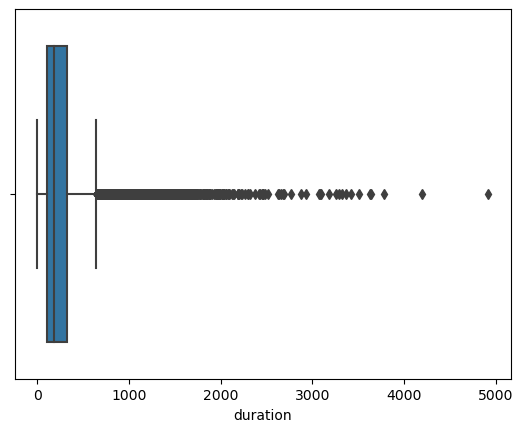

In [17]:
# plot boxplot for duration distribution to identify any outliers
sns.boxplot(df, x='duration')

The boxplot for duration confirms the existence of outliers in the duration column. These outliers will be removed using the Inter-Quartile Range method.

In [18]:
# get 3rd quartile
q3 = df['duration'].quantile(.75)
# get 1st quartile
q1 = df['duration'].quantile(.25)
# get iqr
iqr = q3 - q1
# upper threshold for outliers
upper = q3 + (1.5 * iqr)
# lower threshold for outliers
lower = q1 - (1.5 * iqr)
# filter dataframe to exclude outliers
df = df[(df['duration'] > lower) & (df['duration'] < upper)]

<Axes: xlabel='duration'>

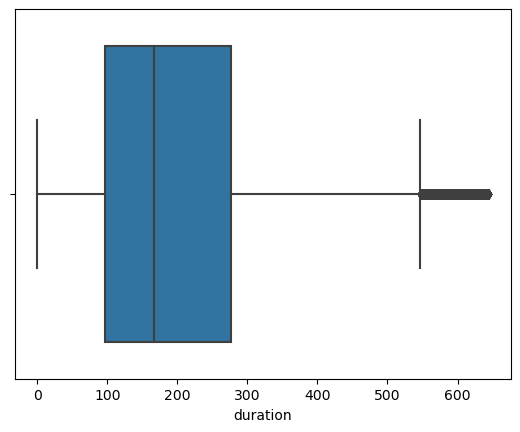

In [19]:
# replot boxplot of duration
sns.boxplot(df, x='duration')

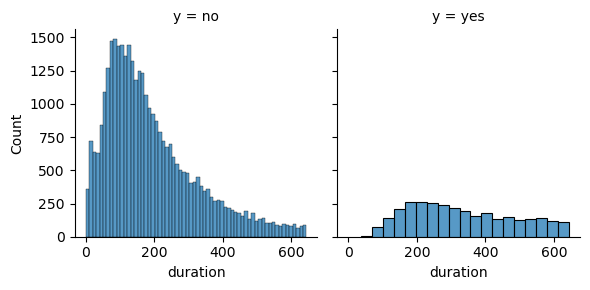

In [20]:
# plot histogram facetgrid for duration by subscription outcome
plot_facetgrid('duration', 'histogram')

The no subscription group seems to have a higher concentration of shorter durations, while the subscription group shows a slightly more evenly distributed range of durations.

In [21]:
# distributiom of campaign column
df['campaign'].value_counts()

1     16483
2      9711
3      4923
4      2441
5      1495
6       910
7       585
8       379
9       264
10      205
11      165
12      117
13       85
14       67
17       54
16       51
15       49
18       32
20       30
19       25
21       24
22       17
23       15
24       15
27       11
29       10
28        8
25        8
30        7
31        7
26        6
35        5
33        4
32        4
34        3
42        2
40        2
43        2
39        1
41        1
37        1
56        1
Name: campaign, dtype: int64

<Axes: xlabel='campaign'>

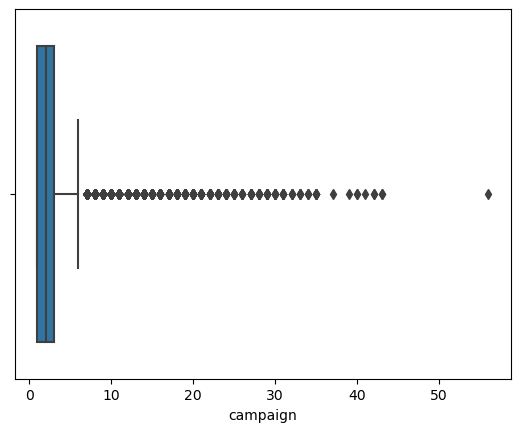

In [22]:
# plot boxplot of campaign column
sns.boxplot(df, x='campaign')

The boxplot for the `campaign` column confirms the existence of outliers. The IQR method will be used to clean these outliers from the data.

In [23]:
# get third quartile
q3 = df['campaign'].quantile(.75)
# get 1st quartile
q1 = df['campaign'].quantile(.25)
# calculate iqr
iqr = q3 - q1
# calculate upper and lower thresholds for outliers
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
# filter data to exclude outliers
df = df[(df['campaign'] > lower) & (df['campaign'] < upper)]

<Axes: xlabel='campaign'>

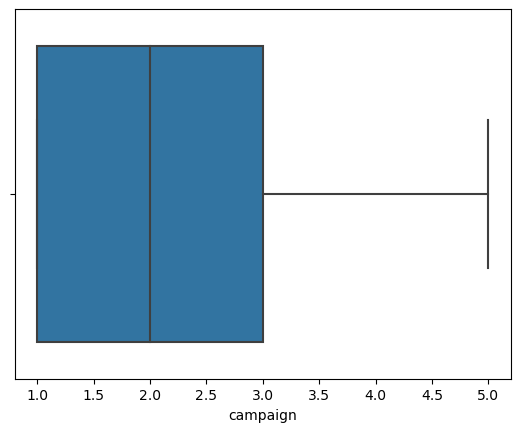

In [24]:
# replot boxplot
sns.boxplot(df, x='campaign')

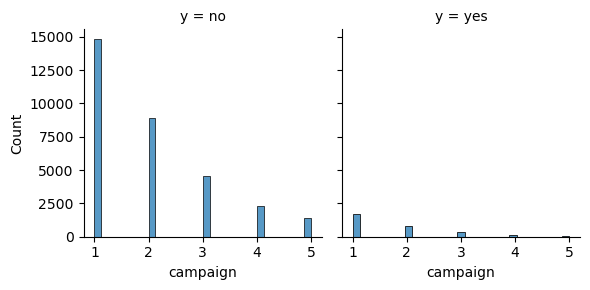

In [25]:
# facetgrid of histogram for campaign by subscription outcome
plot_facetgrid('campaign', 'histogram')

The distribution suggests that in both the non-subscription group (y=no) and the subscription group (y = yes), most individuals have participated in few or no campaigns. However, the subscription group has slightly more variation with a few higher values.

In [26]:
# distribution of pdays
df['pdays'].value_counts()

999    33714
3        397
6        361
4        111
9         58
7         52
2         51
12        50
10        45
5         38
13        30
1         23
11        22
15        22
14        17
8         15
0         13
16        10
17         8
18         6
22         3
21         2
25         1
26         1
27         1
20         1
19         1
Name: pdays, dtype: int64

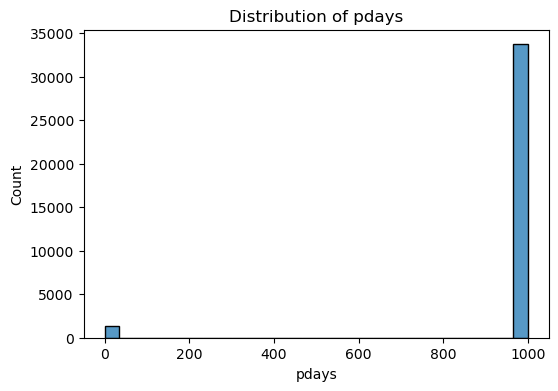

In [27]:
# plot histogram
plot_histogram('pdays')

Majority of the client were contacted after 999 days. However, research on the data shows that 999 means the client has not been previously contacted.

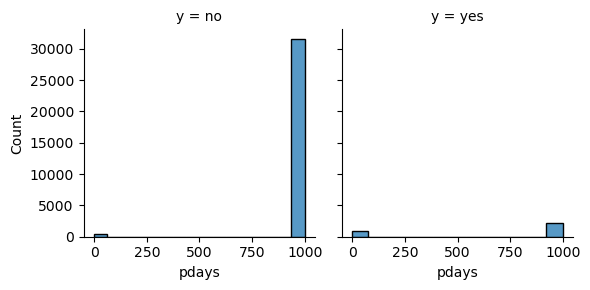

In [28]:
# histograms of pdays by sibscription outcome
plot_facetgrid('pdays', 'histogram')

For the "no" group, most individuals seem to have not been contacted previously, as indicated by the overwhelming number of 1000 values.
For the "yes" group, there is some variation, with a few having recent contact (0 days), while others still have the value of 1000, indicating no prior contact.

In [29]:
# get distribution
df['previous'].value_counts()

0    30010
1     4096
2      670
3      192
4       63
5       16
6        5
7        1
Name: previous, dtype: int64

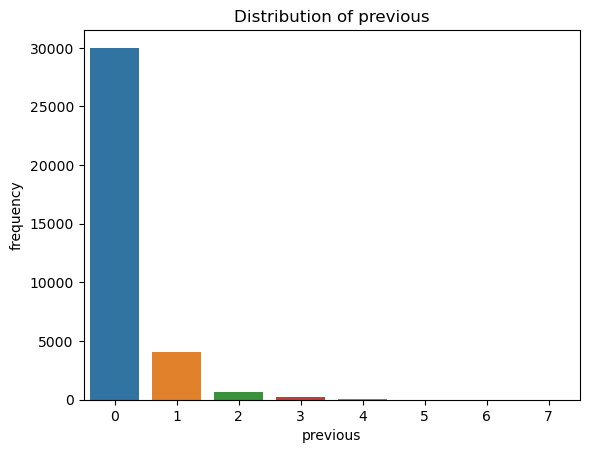

In [30]:
# plot countplot of Distribution
plot_countplot('previous')

The vast majority of observations have a "previous" value of 0, indicating that the majority of individuals have had no prior contact before the current campaign.

C:\Users\ayer\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


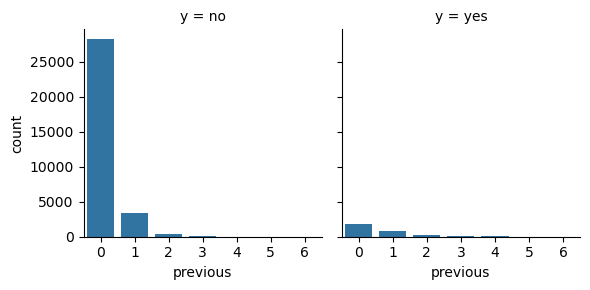

In [31]:
# plot countplot facetgird
plot_facetgrid('previous', 'countplot')

For both groups, majority of clients have not contacted before, while a few have been contacted 1-3 times.

In [32]:
# get distribution
df['emp.var.rate'].value_counts()

 1.4    13125
-1.8     7985
 1.1     6708
-0.1     3310
-2.9     1547
-3.4      980
-1.7      680
-1.1      565
-3.0      143
-0.2       10
Name: emp.var.rate, dtype: int64

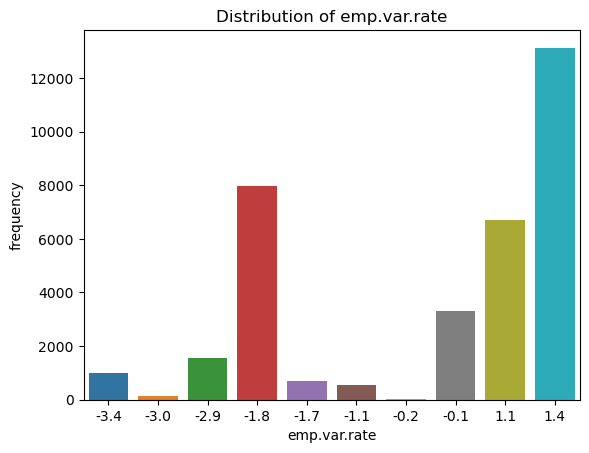

In [33]:
# plot distribution on countplot
plot_countplot('emp.var.rate')

Most of the clients contacted have an employment variation rate value of 1.4

C:\Users\ayer\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


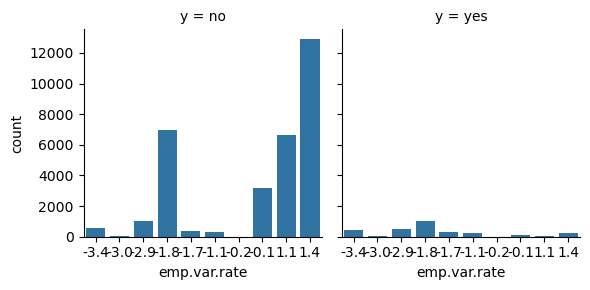

In [34]:
# facetgrid of countplots for emp var rate by subscription outcome
plot_facetgrid('emp.var.rate', 'countplot')

For the subscription group, majority of clients had a negative employment variation rate of -1.8.

In [35]:
# get distribution of consumer price index
df['cons.price.idx'].value_counts()

93.994    6708
93.918    5282
92.893    4966
93.444    4334
94.465    3509
93.200    3249
93.075    2182
92.201     724
92.963     668
92.431     410
92.649     329
94.215     269
94.199     262
92.843     252
93.369     244
92.379     241
94.027     208
94.055     203
93.876     189
94.601     187
92.469     155
93.749     152
92.713     143
94.767     116
93.798      61
92.756      10
Name: cons.price.idx, dtype: int64

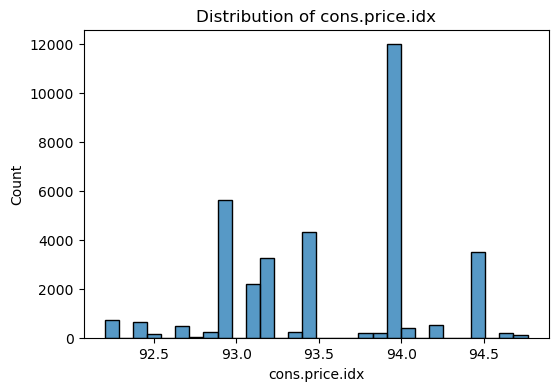

In [36]:
# plot histogram of consumer price index
plot_histogram('cons.price.idx')

Majority of clients had a consumer price index of 94.

In [37]:
# distribution of consumer confidence index
df['cons.conf.idx'].value_counts()

-36.4    6708
-42.7    5282
-46.2    4966
-36.1    4334
-41.8    3509
-42.0    3249
-47.1    2182
-31.4     724
-40.8     668
-26.9     410
-30.1     329
-40.3     269
-37.5     262
-50.0     252
-34.8     244
-29.8     241
-38.3     208
-39.8     203
-40.0     189
-49.5     187
-33.6     155
-34.6     152
-33.0     143
-50.8     116
-40.4      61
-45.9      10
Name: cons.conf.idx, dtype: int64

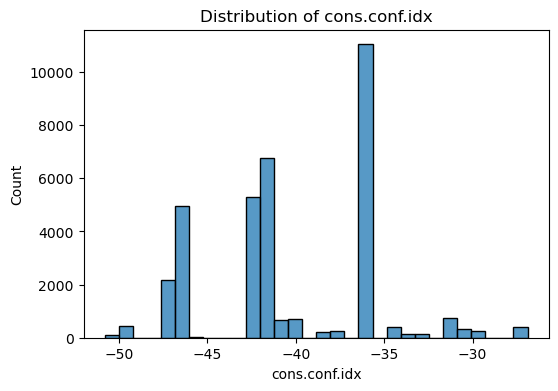

In [38]:
# plot distribution
plot_histogram('cons.conf.idx')

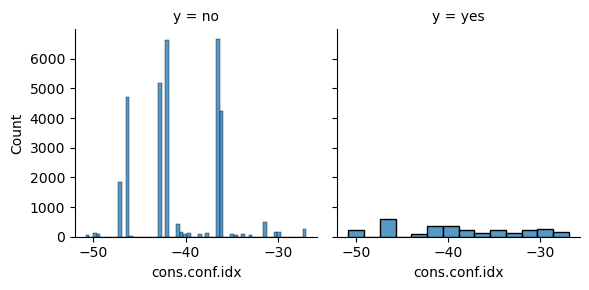

In [39]:
plot_facetgrid('cons.conf.idx', 'histogram')

In [40]:
# get distribution
df['euribor3m'].value_counts()

4.857    2554
4.963    2044
4.962    2038
4.961    1522
4.856    1050
         ... 
0.956       1
1.574       1
3.853       1
3.901       1
0.749       1
Name: euribor3m, Length: 314, dtype: int64

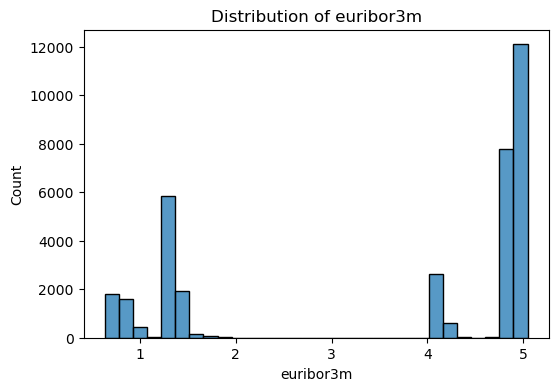

In [41]:
# plot distribution
plot_histogram('euribor3m')

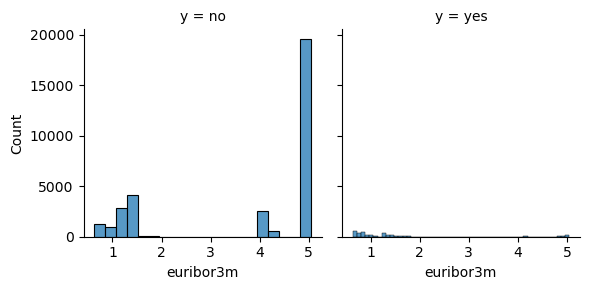

In [42]:
plot_facetgrid('euribor3m', 'histogram')

In [43]:
# distribution of number of employees
df['nr.employed'].value_counts()

5228.1    13125
5099.1     7400
5191.0     6708
5195.8     3310
5076.2     1547
5017.5      980
4991.6      680
5008.7      585
4963.6      565
5023.5      143
5176.3       10
Name: nr.employed, dtype: int64

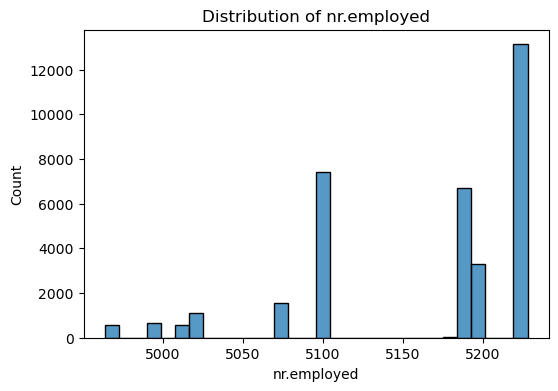

In [44]:
# plot distribution
plot_histogram('nr.employed')

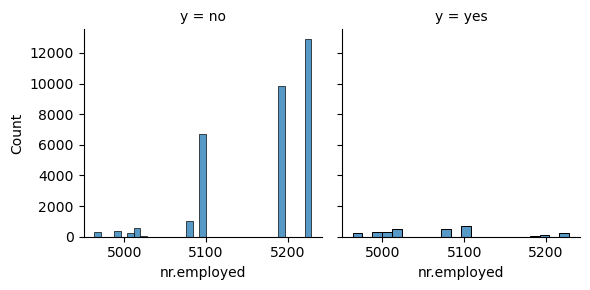

In [45]:
plot_facetgrid('nr.employed', 'histogram')

In [46]:
# get distribution of jobs
df['job'].value_counts()

admin.           8864
blue-collar      7864
technician       5740
services         3350
management       2499
retired          1488
entrepreneur     1250
self-employed    1197
housemaid         894
unemployed        866
student           765
unknown           276
Name: job, dtype: int64

<Axes: >

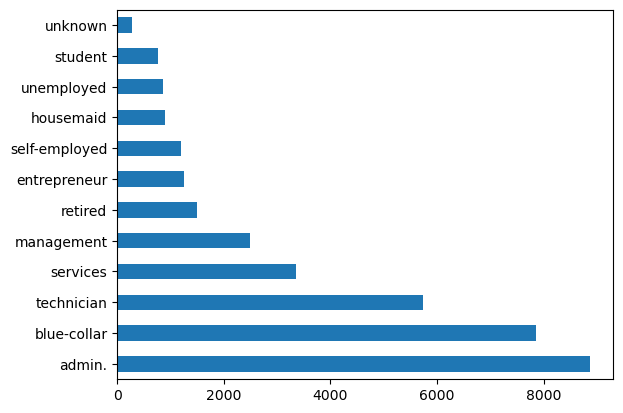

In [47]:
# plot horizontal bar chart of jobs
df['job'].value_counts().plot(kind='barh')

Majority of the clients worked as admin.

In [48]:
df_job = df.groupby(['y', 'job'], as_index=False).size()
pv_job = pd.pivot_table(df_job, values='size', columns=['y'], index='job')
pv_job

y,no,yes
job,,
admin.,7916,948
blue-collar,7570,294
entrepreneur,1183,67
housemaid,820,74
management,2293,206
retired,1136,352
self-employed,1110,87
services,3180,170
student,538,227


For both groups, majority of clients worked as admins.

In [49]:
# get value counts of marital status
df['marital'].value_counts()

married     21251
single       9830
divorced     3913
unknown        59
Name: marital, dtype: int64


EDA for job and target variable
y                no  yes
job                     
admin.         7916  948
blue-collar    7570  294
entrepreneur   1183   67
housemaid       820   74
management     2293  206
retired        1136  352
self-employed  1110   87
services       3180  170
student         538  227
technician     5271  469
unemployed      754  112
unknown         252   24


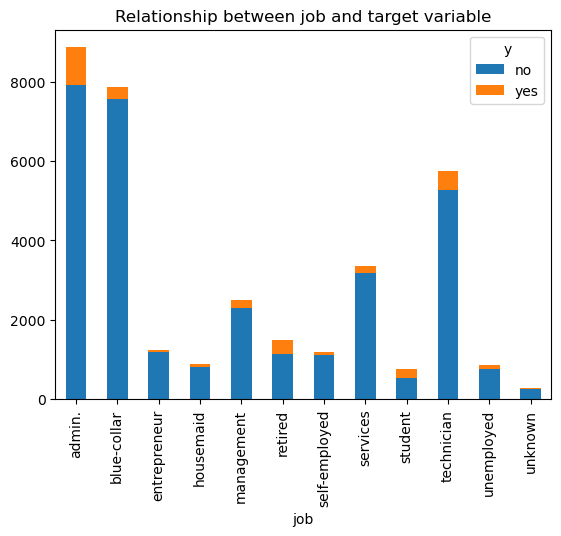


EDA for marital and target variable
y            no   yes
marital              
divorced   3613   300
married   19657  1594
single     8702  1128
unknown      51     8


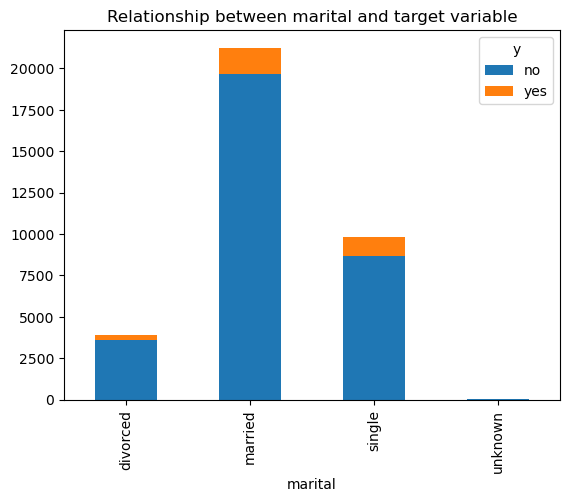


EDA for education and target variable
y                      no   yes
education                      
basic.4y             3249   298
basic.6y             1845    88
basic.9y             4939   241
high.school          7433   639
illiterate             12     3
professional.course  4071   404
university.degree    9192  1176
unknown              1282   181


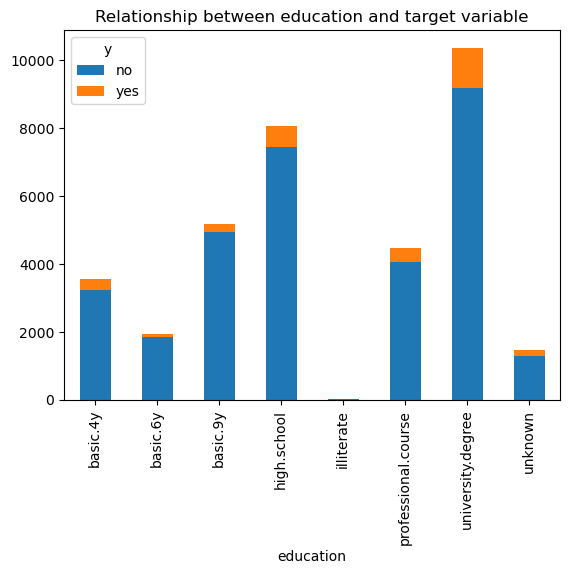


EDA for default and target variable
y           no   yes
default             
no       24983  2870
unknown   7037   160
yes          3     0


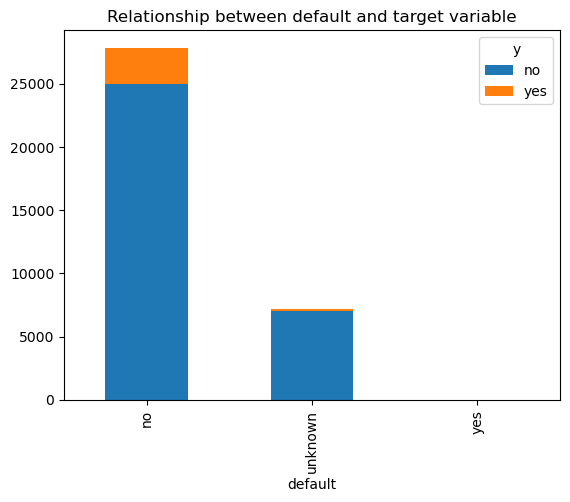


EDA for housing and target variable
y           no   yes
housing             
no       14484  1301
unknown    780    67
yes      16759  1662


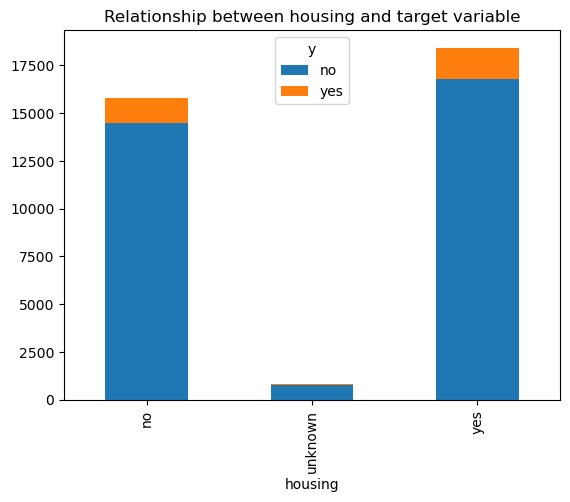


EDA for loan and target variable
y           no   yes
loan                
no       26384  2534
unknown    780    67
yes       4859   429


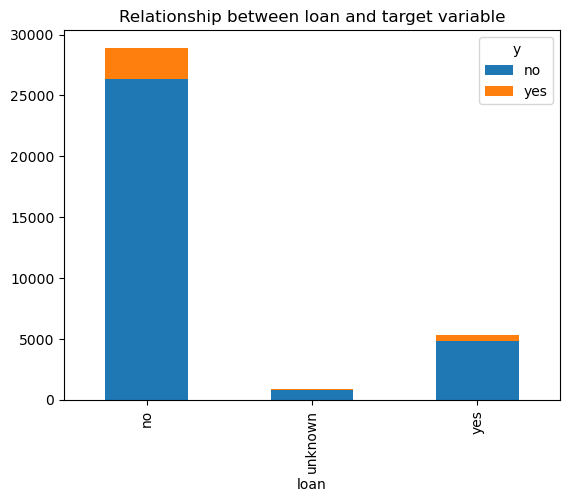


EDA for contact and target variable
y             no   yes
contact               
cellular   19789  2675
telephone  12234   355


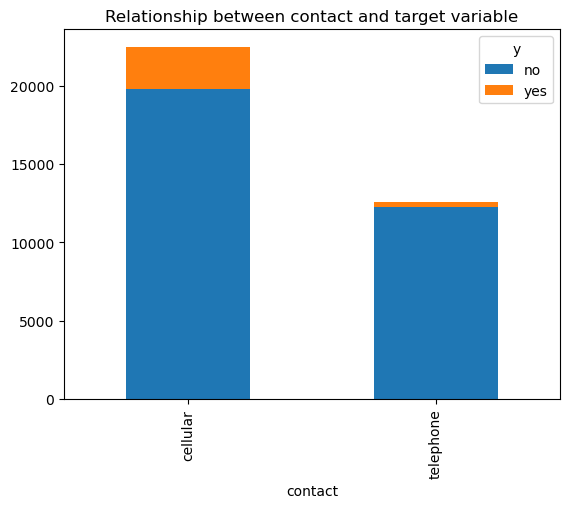


EDA for month and target variable
y         no  yes
month            
apr     1924  410
aug     4839  427
dec       79   74
jul     5404  302
jun     4015  365
mar      243  253
may    11443  420
nov     3414  280
oct      377  281
sep      285  218


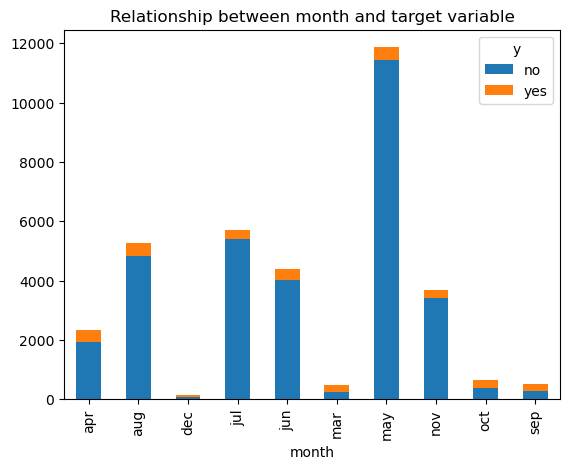


EDA for day_of_week and target variable
y              no  yes
day_of_week           
fri          6058  530
mon          6804  554
thu          6514  697
tue          6334  647
wed          6313  602


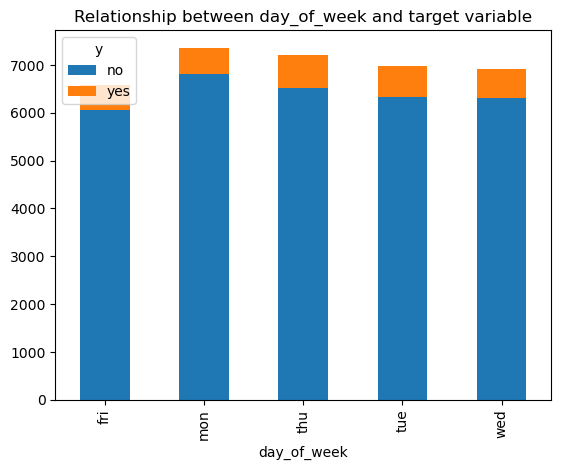


EDA for poutcome and target variable
y               no   yes
poutcome                
failure       3372   451
nonexistent  28214  1796
success        437   783


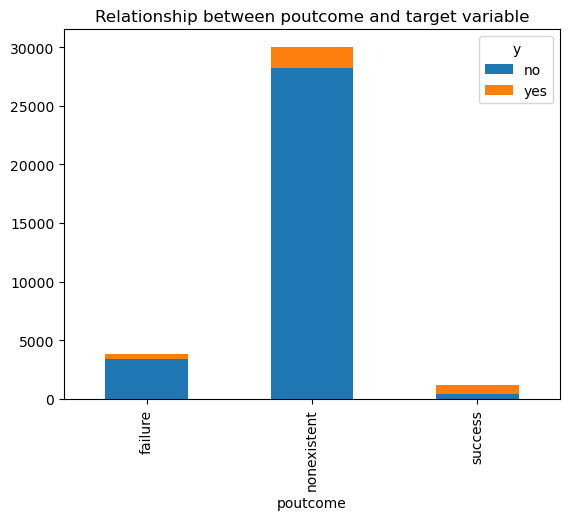

In [50]:
# plot bar charts of categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    if col != 'y':
        print(f"\nEDA for {col} and target variable")
        print(pd.crosstab(df[col], df['y']))
        pd.crosstab(df[col], df['y']).plot(kind='bar', stacked=True)
        plt.title(f'Relationship between {col} and target variable')
        plt.show()


<a id="feature"></a>
#### Feature Engineering


One hot encoding will be used to convert categorical values into a binary format so that it can be effectively used in the model. After encoding, Recursive Feature Limitation (RFE) will be used to determine the best predictors for the model.

In [51]:
encoder = OneHotEncoder(drop='first', sparse=False)

cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [52]:
regression = LogisticRegression()
y = 'y'
new_cols = df_encoded.columns.values
x_vals = [i for i in new_cols if i != y]
rfe = RFE(regression,n_features_to_select=None)
rfe = rfe.fit(df_encoded[x_vals], df_encoded[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\ayer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ayer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\ayer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ayer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[False False False False  True False False False  True False  True  True
 False False  True False  True  True False  True False False  True False
  True  True  True False False False  True  True False False False False
  True  True False  True  True  True  True  True False  True  True  True
 False False False  True  True]
[16 11  4 17  1  9 12 10  1 14  1  1 20 21  1 25  1  1  3  1 26  2  1 27
  1  1  1 24  6  8  1  1 28 22 13 23  1  1 18  1  1  1  1  1 15  1  1  1
  7  5 19  1  1]


In [53]:
selected_features = [col for col, support in zip(x_vals, rfe.support_) if support]
print('Selected Features')
for column in selected_features:
    print(column)

Selected Features
previous
euribor3m
job_blue-collar
job_entrepreneur
job_retired
job_services
job_student
job_unemployed
marital_single
education_basic.6y
education_basic.9y
education_high.school
education_unknown
default_unknown
loan_yes
contact_telephone
month_dec
month_jul
month_jun
month_mar
month_may
month_oct
month_sep
day_of_week_mon
poutcome_nonexistent
poutcome_success


The above columns have been identified as being ideal for the model. These features will be used to develop the model.

<a id="model"></a>
#### Building and Evaluation

In [54]:
x = df_encoded[selected_features]
y = df_encoded['y']

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [56]:
model = LogisticRegression()

In [57]:
model.fit(x_train, y_train)

LogisticRegression()

In [58]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9281129653401797


In [59]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[6338   72]
 [ 432  169]]


In [60]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

          no       0.94      0.99      0.96      6410
         yes       0.70      0.28      0.40       601

    accuracy                           0.93      7011
   macro avg       0.82      0.63      0.68      7011
weighted avg       0.92      0.93      0.91      7011



Overall, 93% of the predictions made by the model are accurate. 

For precision, 94% of the predicted "no" values are accurate while 70% of the predicted "yes" values are accurate.This means that when the model predicts that a client will subscribe to a term deposit, it is correct 70% of the time.

For recall, the model correctly captures 99% of the actual "no' cases and only 28% of the actual "yes" cases. This means that  the model misses 72% of the actual clients who subscribe to term deposits.

For F1 score, 0.96 for the "no" group indicates excellent performance of the model in predicting "no" values while 0.41 for the "yes" group indicates very poor performance.

The support value indicates that there were 6410 clients who did not subscribe and 601 clients who subscribed. This indicates an in imbalance in the data and explains why the model performs well on the "no" group but poorly on the "yes" group.

In conclusion, the model is good for predicting clients who will not subscribe to the term deposit but poor for predicting clients who will, and thus, it needs improvement. The model will be rebuilt using the oversampling technique because it synthetically generates samples for the minority class to balance the dataset.

In [61]:
smote = SMOTE(random_state=0)
x_resampled, y_resampled = smote.fit_resample(x,y)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [62]:
newmodel = LogisticRegression()

In [63]:
newmodel.fit(x_train, y_train)

LogisticRegression()

In [64]:
predicted_y = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted_y)
print(accuracy)

0.6240437158469946


In [65]:
class_report = classification_report(y_test, predicted_y)
print(class_report)

              precision    recall  f1-score   support

          no       0.57      0.99      0.72      6408
         yes       0.95      0.26      0.41      6402

    accuracy                           0.62     12810
   macro avg       0.76      0.62      0.57     12810
weighted avg       0.76      0.62      0.57     12810



The model now predicts clients who will subscribe to the term deposit by 95%, an increment from the 66% in the earlier model. Accuracy has however dropped to 62% because the imbalance has been resolved.

In [66]:
undersample = RandomUnderSampler(random_state=0)

resample_x, resample_y = undersample.fit_resample(x,y)

In [67]:
x_train, x_test, y_train, y_test = train_test_split(resample_x, resample_y, test_size=0.2, random_state=0)

In [68]:
undersampledmodel = LogisticRegression()

In [69]:
undersampledmodel.fit(x_train, y_train)

LogisticRegression()

In [70]:
prediction = model.predict(x_test)

accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.6320132013201321


In [71]:
class_report = classification_report(y_test, prediction)
print(class_report)

              precision    recall  f1-score   support

          no       0.58      0.99      0.73       611
         yes       0.96      0.27      0.42       601

    accuracy                           0.63      1212
   macro avg       0.77      0.63      0.58      1212
weighted avg       0.77      0.63      0.58      1212



The results of using the undersampled model are similar to the results of the oversampled model. A combination of undersampling and oversampling will be used to develop a new model for potential improvements.

In [72]:
smote_tomek = SMOTETomek(random_state=0)
x_resampled, y_resampled = smote_tomek.fit_resample(x,y)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [74]:
combinedmodel = LogisticRegression()

In [75]:
undersampledmodel.fit(x_train, y_train)

LogisticRegression()

In [76]:
prediction = model.predict(x_test)

accuracy = accuracy_score(y_test, prediction)
print(accuracy)

0.6211453744493393


In [77]:
class_report = classification_report(y_test, prediction)
print(class_report)

              precision    recall  f1-score   support

          no       0.57      0.99      0.72      6253
         yes       0.96      0.27      0.42      6459

    accuracy                           0.62     12712
   macro avg       0.76      0.63      0.57     12712
weighted avg       0.76      0.62      0.57     12712



Like the models built on oversampling and undersampling, the model built on the combined method reduces accuracy to 60% because the imabalance in the original dataset has been resolved. The combined method module predicts clients who will subscribe to the term deposit with a precision of 96%.

A new model will now be developed using class weighting to check for potential improvements.

In [78]:
# Train model with class weight
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(x_train, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

In [79]:
predicted = model.predict(x_test)

accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.8366852089573528


In [80]:
class_report = classification_report(y_test, predicted)
print(class_report)

              precision    recall  f1-score   support

          no       0.98      0.84      0.90      6410
         yes       0.32      0.81      0.46       601

    accuracy                           0.84      7011
   macro avg       0.65      0.82      0.68      7011
weighted avg       0.92      0.84      0.87      7011



After using class weighting, the accuracy is 84%, an increment on the models built on the different sampling methods. Even though this model has a precision rate of 32%, it has a recall rate of 81%. This means that 81% of the actual clients who subscribe to a term deposit are captured correctly. From a business perspective, it is better to have a model that has a higher chance of capturing potential subscribers. If the bank misses predicting a client as a potential subscriber (false negative), it misses the chance to market the term deposit to them. While the bank may spend effort marketing to non-subscribers, it’s better than losing out on real potential clients. Therefore the model developed using class weighting will be used.

In [81]:
coeffs = model.coef_[0]

intercept = model.intercept_[0]

feature_importance = dict(zip(selected_features, coeffs))

for key, value in feature_importance.items():
    print(f"{key}: {value}")

previous: 0.23420366811536328
euribor3m: -0.7022289900432136
job_blue-collar: -0.243500771484465
job_entrepreneur: 0.013016751406189412
job_retired: 0.37403787516465953
job_services: -0.21929809667510894
job_student: 0.49826572855454965
job_unemployed: 0.12160370549400545
marital_single: 0.07363610122282367
education_basic.6y: -0.17428603008771162
education_basic.9y: -0.29106062749962036
education_high.school: -0.22519609842187827
education_unknown: 0.08199440030969081
default_unknown: -0.5127130578232933
loan_yes: -0.13009912637567306
contact_telephone: -0.0491759767903941
month_dec: 0.8184674289103796
month_jul: 0.2864044003724857
month_jun: 0.27635193056277013
month_mar: 1.2242776380842084
month_may: -1.0490793471305786
month_oct: 1.5681843293285807
month_sep: 0.3029277355273047
day_of_week_mon: -0.1439332783746413
poutcome_nonexistent: 0.6849391342620745
poutcome_success: 1.9889759355624064


features with a positive coefficient are the most impactful features in terms of if a client will subscribe to the term deposit.

<a id="conclude"></a>
#### Conclusion

##### Impactful features
The result of performing feature selection on the dataset indicated that the following are the features which are most impactful on predicting whether a client will subscribe to a term deposit.

- campaign
- previous
- emp.var.rate
- euribor3m
- job
- education
- default
- contact
- month
- day_of_week
- poutcome

##### Clients likely to subscribe
The common characteristics of clients likely to subscribe are as follows.
- Clients who had a successful outcome in a previous campaign.
- Clients contacted in March, December,August, and July are more likely to subscribe.
- Clients who are students are more likely to subscribe to the term deposit.
- Clients who were previously contacted are more likely to subscribe.
- Retired individuals show an increased likelihood to subscribe.

##### Recommendations for marketing team
- Focus on clients with a history of successful campaigns
- Prioritize outreach during high-impact months (March, December,August, and July)
- Target students and retired clients
- Improve Messaging for Clients with No Previous Contact Outcome


##### Limitations
- The dataset used is imbalanced.
- The model is heavily skewed toward predicting no
- Logistic regression is a linear model and assumes a linear relationship between predictors and the log-odds of the outcome.